In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


EDA

In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

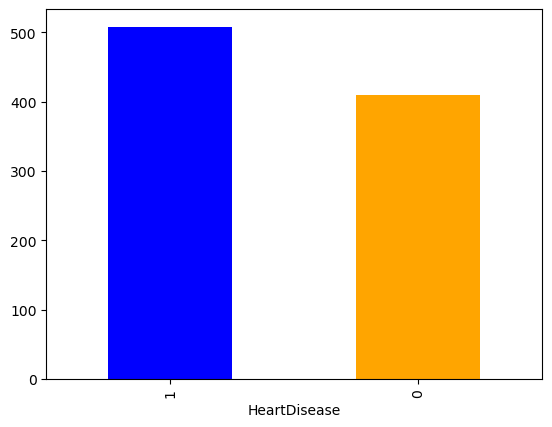

In [7]:
df['HeartDisease'].value_counts().plot(kind='bar', color=['blue', 'orange'])

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

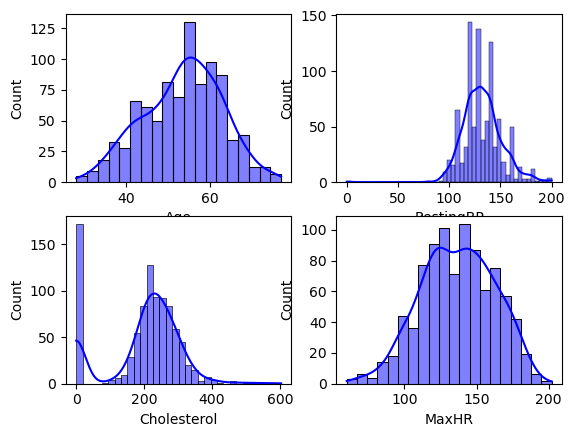

In [9]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True, color='blue')
plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

In [10]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [11]:
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()
ch_mean


np.float64(244.6353887399464)

In [12]:
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean).round(2)


In [13]:
restingBP_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].replace(0, restingBP_mean).round(2)
df['RestingBP'] = df['RestingBP'].round(2)

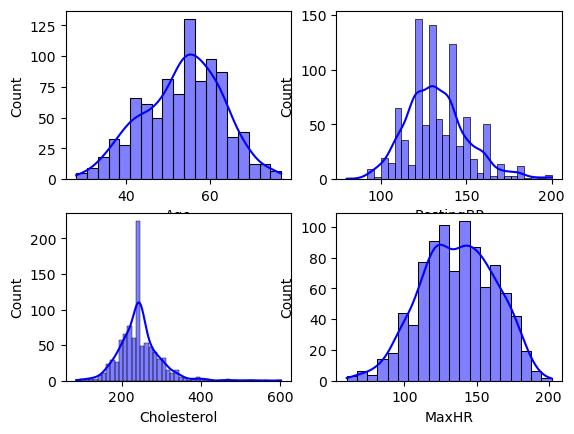

In [14]:
plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

In [15]:
pip install sheryanalysis==0.1.0

Note: you may need to restart the kernel to use updated packages.


In [16]:
import sheryanalysis as sh
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

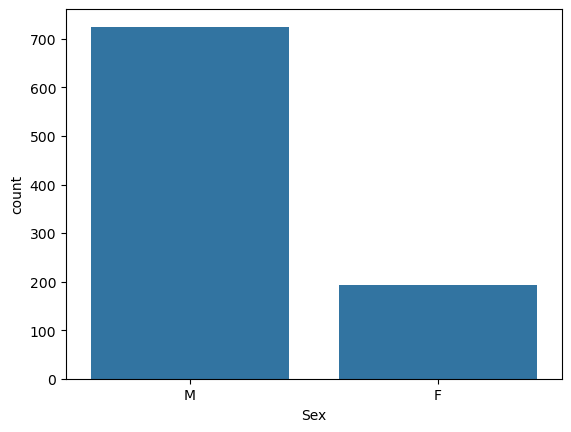

In [17]:
sns.countplot(x = df['Sex'])

<Axes: xlabel='ChestPainType', ylabel='count'>

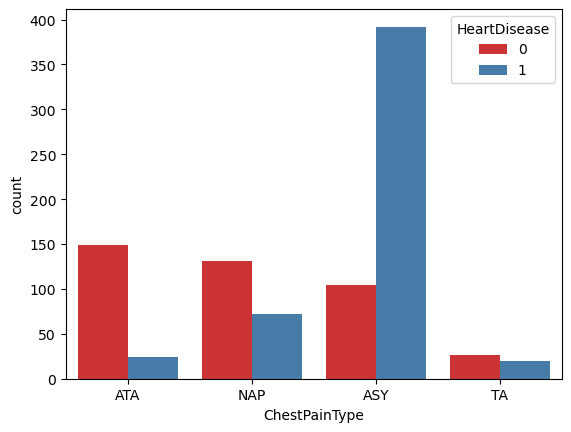

In [18]:
sns.countplot(x=df['ChestPainType'], hue = df['HeartDisease'], palette='Set1')

<Axes: xlabel='FastingBS', ylabel='count'>

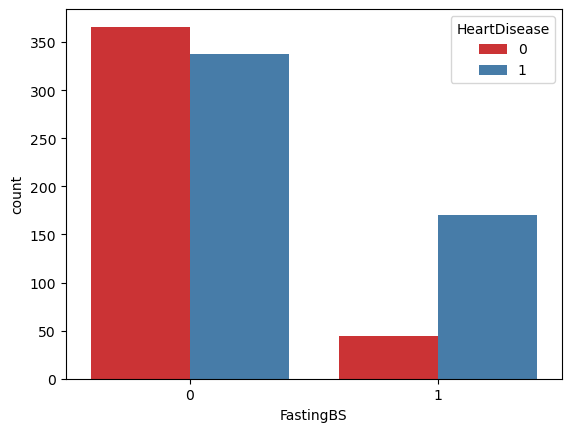

In [19]:
sns.countplot(x=df['FastingBS'], hue = df['HeartDisease'], palette='Set1')

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

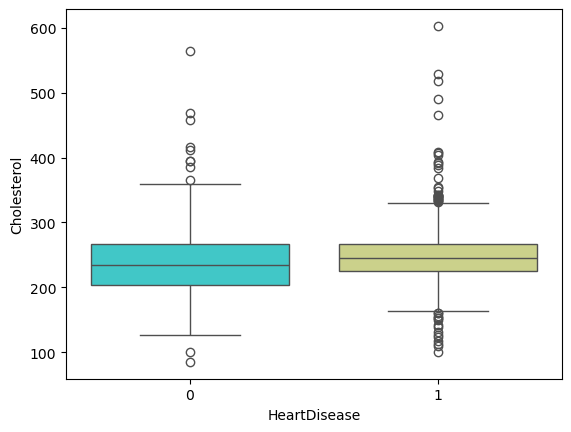

In [20]:
sns.boxplot(x = df['HeartDisease'], y = df['Cholesterol'], palette='rainbow')

<Axes: xlabel='HeartDisease', ylabel='Age'>

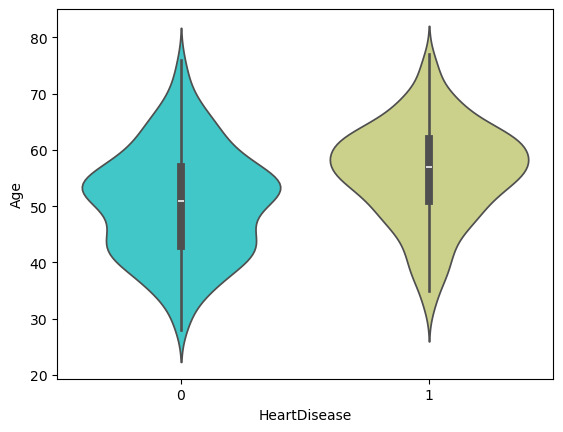

In [21]:
sns.violinplot(x = df['HeartDisease'], y = df['Age'], palette='rainbow')

<Axes: >

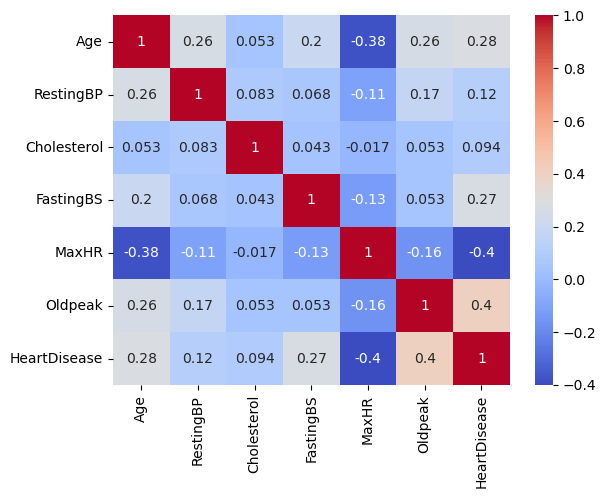

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [23]:
# DAta preprocessing and cleaning
df_encode = pd.get_dummies(df, drop_first=True)
df_encode.astype(int)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_encode[cols] = scaler.fit_transform(df_encode[cols])
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414853,0.832513,0,1.382928,-0.832432,0,True,True,False,False,True,False,False,False,True
1,-0.478484,1.527192,-1.212938,0,0.754157,0.105664,1,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.141317,0.719919,0,-1.525138,-0.832432,0,True,True,False,False,False,True,False,False,True
3,-0.584556,0.303619,-0.574908,0,-1.132156,0.574711,1,False,False,False,False,True,False,True,True,False
4,0.051881,0.971022,-0.931454,0,-0.581981,-0.832432,0,True,False,True,False,True,False,False,False,True


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [26]:
x = df_encode.drop('HeartDisease', axis = 1)
y = df_encode['HeartDisease']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [28]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414853,0.832513,0,1.382928,-0.832432,0,True,True,False,False,True,False,False,False,True
1,-0.478484,1.527192,-1.212938,0,0.754157,0.105664,1,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.141317,0.719919,0,-1.525138,-0.832432,0,True,True,False,False,False,True,False,False,True
3,-0.584556,0.303619,-0.574908,0,-1.132156,0.574711,1,False,False,False,False,True,False,True,True,False
4,0.051881,0.971022,-0.931454,0,-0.581981,-0.832432,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253656,0.363372,0,-0.188999,0.293283,1,True,False,False,True,True,False,False,True,False
914,1.536902,0.637321,-0.968986,1,0.164684,2.357094,1,True,False,False,False,True,False,False,True,False
915,0.370100,-0.141317,-2.132453,0,-0.857069,0.293283,1,True,False,False,False,True,False,True,True,False
916,0.370100,-0.141317,-0.162065,0,1.461525,-0.832432,1,False,True,False,False,False,False,False,True,False


In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [30]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "SVM" : SVC()
}
result = []
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    result.append({
        'model' : name,
        'Accuracy' : round(acc, 4),
        'F1 Score' : round(f1, 4)
    })
    

In [31]:
result

[{'model': 'Logistic Regression', 'Accuracy': 0.8641, 'F1 Score': 0.8804},
 {'model': 'KNN', 'Accuracy': 0.8533, 'F1 Score': 0.8708},
 {'model': 'Naive Bayes', 'Accuracy': 0.8533, 'F1 Score': 0.8683},
 {'model': 'Decision Tree', 'Accuracy': 0.7826, 'F1 Score': 0.8077},
 {'model': 'SVM', 'Accuracy': 0.8478, 'F1 Score': 0.8679}]

In [32]:
import joblib
joblib.dump(['Logistic Regression'], 'LogisticReg_heart.pkl')
joblib.dump(scaler, 'scaler_heart.pkl')
joblib.dump(x.columns.tolist(), 'columns.pkl')


['columns.pkl']